In [2]:
!pip install tensorboard

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached protobuf-5.28.3-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached pyasn1_modules-0.4.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 16.1 MB/s eta 0:00:0000:0100:01
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 20.4 MB/s eta 0:00:0000:0100:01
Using cached Markdown-3.7-py3-none-any.whl (106 kB)
   ━━━━━━━━━━━━━━━━━━

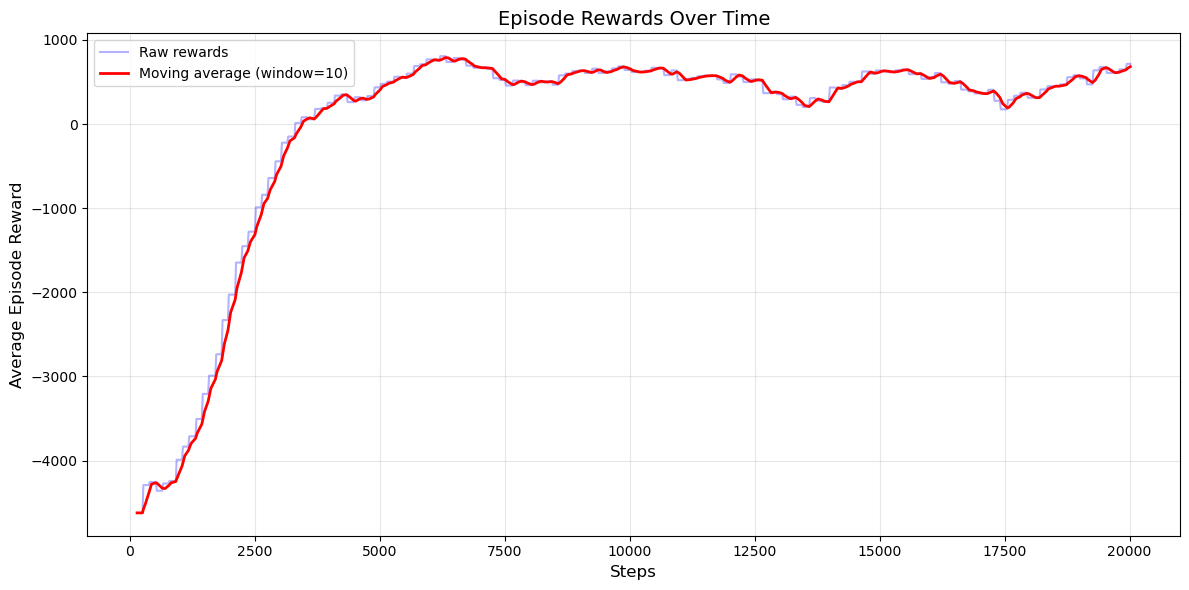

In [6]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def calculate_moving_average(values, window_size=50):
    """Calculate moving average of values with specified window size."""
    return pd.Series(values).rolling(window=window_size, min_periods=1).mean()

def visualize_rewards(events_file_path, ma_window=1):
    """
    Visualize only the rollout/ep_rew_mean metric from a TensorBoard events file.
    
    Args:
        events_file_path (str): Path to the events file
        ma_window (int): Window size for moving average calculation
    """
    # Load the events file
    ea = event_accumulator.EventAccumulator(
        events_file_path,
        size_guidance={
            event_accumulator.SCALARS: 0,
            event_accumulator.COMPRESSED_HISTOGRAMS: 0,
            event_accumulator.IMAGES: 0,
            event_accumulator.AUDIO: 0,
            event_accumulator.HISTOGRAMS: 0,
        }
    )
    ea.Reload()

    # Get reward data
    tag = "rollout/ep_rew_mean"
    if tag not in ea.Tags()['scalars']:
        print(f"No {tag} data found in the events file.")
        return None

    scalar_events = ea.Scalars(tag)
    steps = [event.step for event in scalar_events]
    values = [event.value for event in scalar_events]

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot original values
    ax.plot(steps, values, 'b-', alpha=0.3, label='Raw rewards')

    # Calculate and plot moving average
    ma_values = calculate_moving_average(values, ma_window)
    ax.plot(steps, ma_values, 'r-', linewidth=2, 
            label=f'Moving average (window={ma_window})')

    # Customize plot
    ax.set_title('Episode Rewards Over Time', fontsize=14)
    ax.set_xlabel('Steps', fontsize=12)
    ax.set_ylabel('Average Episode Reward', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)

    plt.tight_layout()
    return fig

if __name__ == "__main__":
    events_file = "/Users/joelt/CE290I_HW6_Files/test/290I-RLOps/RL-UAM/logs/sb3/optuna/FlatPPO/FlatPPO_2024-11-25_19-02-18_MaskablePPO/tensorboard/PPO_1/events.out.tfevents.1732586538.77a2995f49e5.1.0"
    fig = visualize_rewards(events_file, ma_window=10)
    if fig is not None:
        plt.show()